In [1]:
import numpy as np
from nm_lib import nm_lib as nm
import threading

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Riemann scheme. 

Lets consider same setup as in [ex_3a](https://github.com/AST-Course/AST5110/blob/main/ex_3a.ipynb) Burgers’ equation, i.e.,

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0   \tag{1}$$ 

for the domain $x \in (x_0, x_f)$ with $x_0 = −1.4$, $x_f = 2.0$ with initial condition:

$$u(x,t=0) = A\left[\tanh\left(\frac{x+x_c}{W}\right)-\tanh\left(\frac{x-x_c}{W}\right)\right]   \tag{2}$$

whereby $A = 0.02$ , $x_c = 0.70$, $W = 0.1$. Let the solution evolve until time $t_f = 100$. However, let's now implement a new time-step method. Find the conservative form of the equation and implement a Rieman solver [wiki:Rieman Solvers](https://github.com/AST-Course/AST5110/wiki/Riemann-solvers). 

Add this to your library and solve the previous simulation imposing the CFL condition. For this exercise, fill in `nm_lib` the function `evolv_Rie_uadv_burgers`. 

In [2]:
def u(x, A, W, xc):
    return A * (np.tanh((x+xc)/W) - np.tanh((x-xc)/W))

In [3]:
def tangent(xx, hh, i):
    return hh[i] + np.gradient(hh)[i]/np.gradient(xx)[i] * (xx - xx[i])

In [7]:
A = 0.02
xc = 0.70
W = 0.1

x0 = -1.4
xf = 2.0
#number of x-points
nump = 128
#number of t-points
nt = 100
#xgrid
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0
hh = u(xx, A, W, xc)

tt, unnt = nm.evolv_Rie_uadv_burgers(xx, hh, nt, ddx=nm.deriv_cent)

/Users/tabjone/Desktop/nm_lib/nm_lib/nm_lib.py:527: RuntimeWarning: divide by zero encountered in divide
  a_uRL = (tangent_uR - tangent_uL)/(hh[-1] - hh[0])
/Users/tabjone/Desktop/nm_lib/nm_lib/nm_lib.py:529: RuntimeWarning: invalid value encountered in multiply
  lin_approx = a_uRL * (hh - hh[-1]) + tangent_uR
/Users/tabjone/Desktop/nm_lib/nm_lib/nm_lib.py:108: RuntimeWarning: invalid value encountered in subtract
  return (np.roll(hh, -1) - np.roll(hh, 1))/(2*dx)


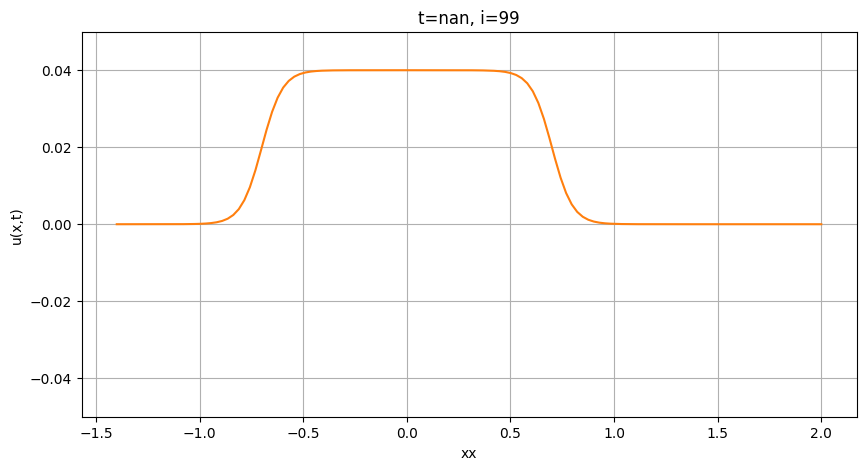

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

def init(): 
    axes.plot(xx,unnt[0,:])
    axes.set_ylim(-0.05, 0.05)
    axes.set_xlabel("xx")
    axes.set_ylabel("u(x,t)")
    axes.grid(True)
    
def animate(i):
    axes.clear()
    axes.plot(xx,unnt[i,:])
    axes.set_title('t={:.2f}, i={:g}'.format(tt[i],i))
    axes.grid(True)
    axes.set_xlabel("xx")
    axes.set_ylabel("u(x,t)")
    axes.set_ylim(-0.05, 0.05)

anim = FuncAnimation(fig, animate, interval=50, frames=nt, init_func=init)
HTML(anim.to_jshtml())

#### 1 step

Compute left and right of $u$, i.e., $u_L$ and $u_R$

#### 2 step
Compute from those the flux, i.e., $F_L$ and $F_R$

#### 3 step
Compute the propagating speed ($v_a[i]=max(|u[i],|u[i-1]|)$)

#### 4 step
Compute the interface fluxes (Rusanov)

$rhs=(F_R+F_L)/2 - v_a (U_R -U_L)$

#### 5 step
Advance in time $u^{n+1}=u^n + dt\times rhs$. What is dt? 


Is this method less or more diffusive than Lax method? Find the analytical solution and compare. Where and when is better or worse than the Lax method? 

---
## TVD scheme. 

Combine the Lax method with the Rieman solver using a flux limiter scheme. For this, one needs to identify how large are the gradients. Lets define: 

$$r^{+}_i = \frac{u_i-u_{i-1}}{u_{i+1}+u_i}$$

What kind of properties do you see on $r^{+}_i$? e.g., what happens when $r\ge0$? or $r\le0$? 

now lets consider the following flux limiter: 

$$\phi = max\left(0,min\left(\theta r,\frac{1+r}{2},\theta \right)\right),\, \theta =[1,2]$$

Finally, combine the Lax from previous excersice with the Riemann solver using the flux limiter as follows: 

$$u^{n+1}_i = u^n_i + dt (f^n_{i+1/2}-f^n_{i-1/2})$$

Where 

$$f^n_{i+1/2} = f^{Riemann}_{i+1/2} + \phi^n_i (f^{L}_{i+1/2}-f^{Riemann}_{i+1/2})$$



When becomes purely Rieman solver? And Lax? Which others methods you can find depending on what is $r$ of $\phi$. 

Find also out what the flux is depending on the flux-limiting method.